In [23]:
import pandas as pd
import seaborn as sns

# Exploratory Data Anlysis (EDA)

## Load data

In [24]:
df = pd.read_csv("../dataset/dataset2.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
features= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

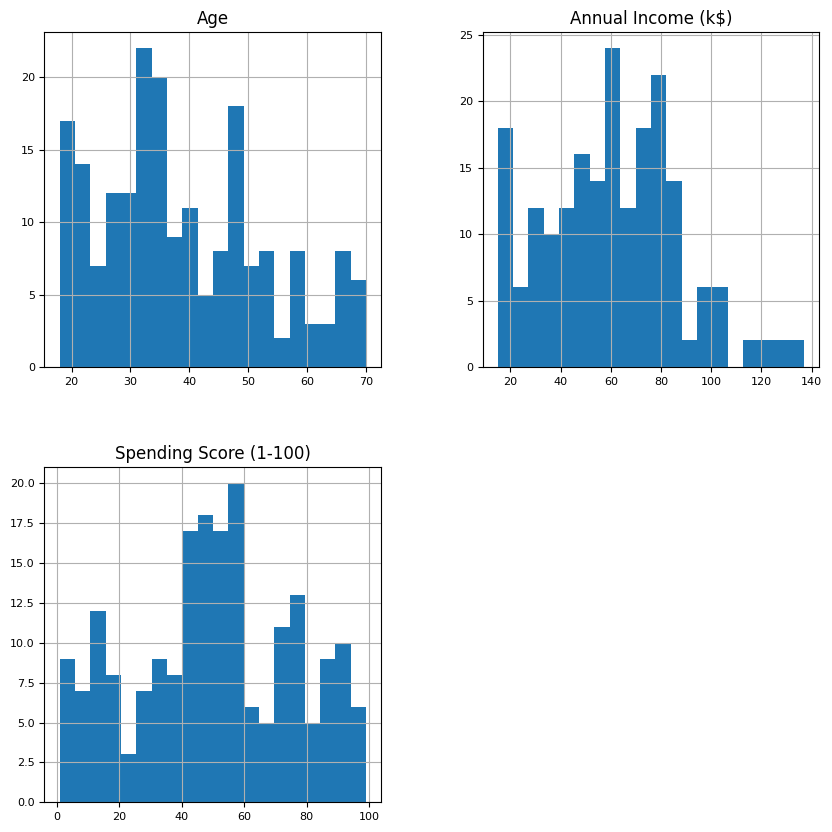

In [7]:
df[features].hist(figsize=(10, 10), bins=20, xlabelsize=8, ylabelsize=8)

### Insight:
- Data terdiri dari 5 fitur dengan empat fitur numerikal dan satu fitur kategorikal,
- Untuk clustering, akan diambil fitur numerikal saja (CustomerID tidak termasuk) karena clustering akan bekerja lebih baik tanpa fitur kategorikal,
- Sebelum dikelompokkan (cluster), data dinormalisasi dulu agar algoritma clustering dapat bekerja lebih baik. 

## Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[features])
df_scaled= pd.DataFrame(df_scaled, columns=features)
df_scaled

# standardized_df = (df[features] - df[features].mean()) / df[features].std()
# standardized_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

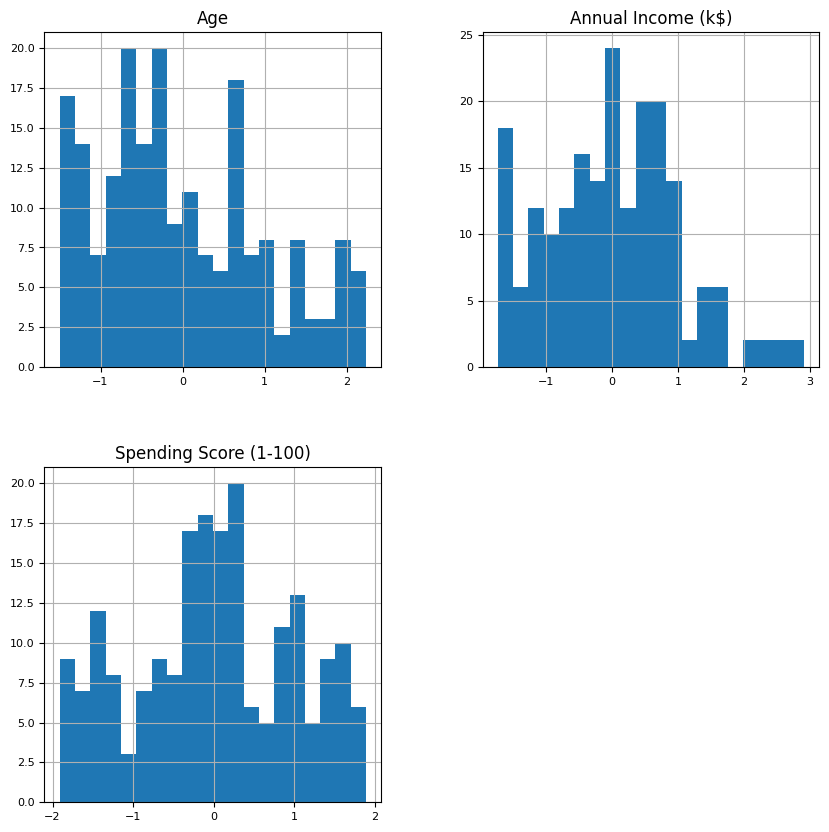

In [9]:
df_scaled[features].hist(figsize=(10, 10), bins=20, xlabelsize=8, ylabelsize=8)

Kenapa harus dinormalisasi?
Karena algoritma clustering membutuhkan data dinormalisasi agar hasilnya maksimal.

# Clustering Data

## KMeans Clustering

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

df_scaled['cluster'] = kmeans.labels_
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,4
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,4


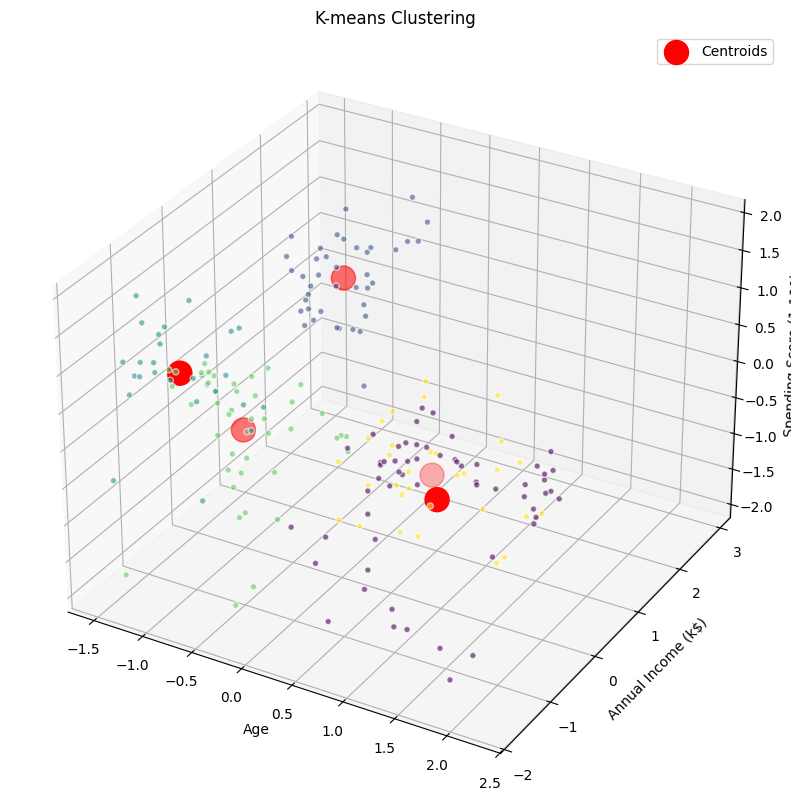

In [11]:
import matplotlib.pyplot as plt

# Plot hasil clustering
fig= plt.figure(figsize=(10, 10))

ax= fig.add_subplot(111, projection='3d')

# Plot data with the first two features and cluster as their color
ax.scatter(df_scaled['Age'], df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'], c=df_scaled['cluster'], alpha=0.6, edgecolors='w')

# Plot centroid
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')

# Add legend
plt.title("K-means Clustering")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.legend()

# Show plot
plt.show()


In [12]:
kmeans.cluster_centers_

array([[ 1.17882975, -0.49388609, -0.32971553],
       [-0.42880597,  0.97484722,  1.21608539],
       [-0.93876351, -1.31473131,  0.95680216],
       [-0.86957306, -0.23851652, -0.36060916],
       [ 0.39737911,  1.11508909, -1.23126963]])

In [13]:
from unsupervised_learning.kmeans_clustering import KMeans

kmeans = KMeans(n_clusters=5, max_iter=300, init='kmeans++')

df_scaled['cluster'] = kmeans.fit(df_scaled.values)
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,3
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,3
198,-0.491602,2.917671,-1.250054,1


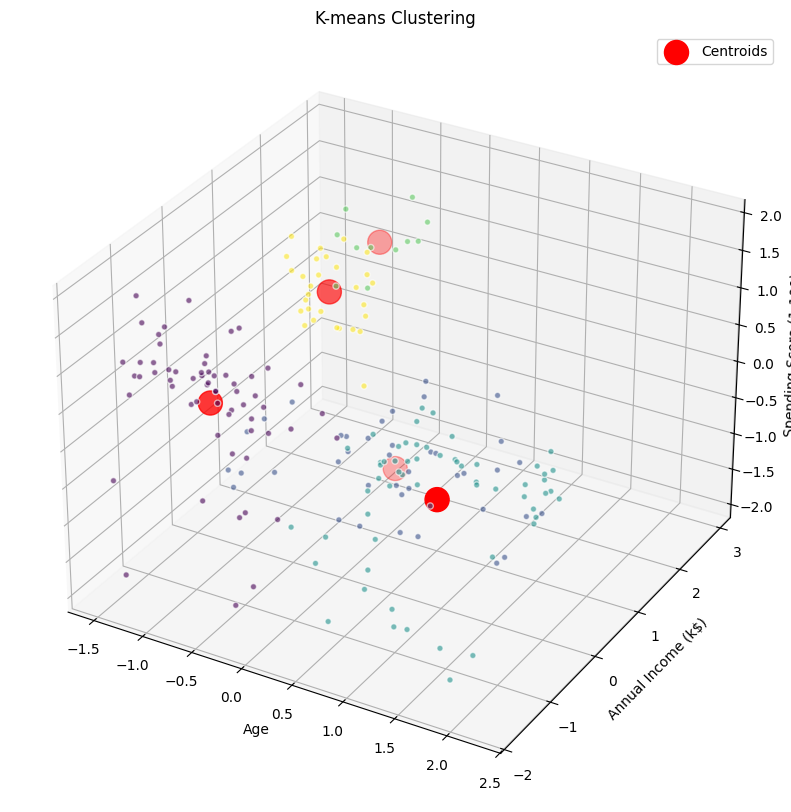

In [14]:
import matplotlib.pyplot as plt

# Plot hasil clustering
fig= plt.figure(figsize=(10, 10))

ax= fig.add_subplot(111, projection='3d')

# Plot data with the first two features and cluster as their color
ax.scatter(df_scaled['Age'], df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'], c=df_scaled['cluster'], alpha=0.6, edgecolors='w')

# Plot centroid
ax.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], kmeans.centroids[:, 2], s=300, c='red', label='Centroids')

# Add legend
plt.title("K-means Clustering")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.legend()

# Show plot
plt.show()


## DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['cluster'] = dbscan.fit_predict(df_scaled.values)
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,-1
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,-1
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,-1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-1
196,0.441365,2.497807,-0.861839,-1
197,-0.491602,2.497807,0.923953,-1
198,-0.491602,2.917671,-1.250054,-1


In [17]:
df_scaled['cluster'].value_counts()

cluster
-1    70
 1    46
 2    28
 3    27
 0    17
 4     7
 5     5
Name: count, dtype: int64

In [18]:
from unsupervised_learning.dbscan import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

df_scaled['cluster'] = dbscan.fit(df_scaled.values)

df_scaled['cluster'].value_counts()

cluster
-1     79
 19    10
 6      7
 14     7
 1      6
 3      6
 21     6
 22     6
 5      6
 7      6
 13     6
 11     6
 0      5
 25     5
 4      5
 10     4
 9      4
 23     4
 8      4
 2      4
 20     3
 24     3
 15     2
 18     2
 12     2
 16     1
 17     1
Name: count, dtype: int64

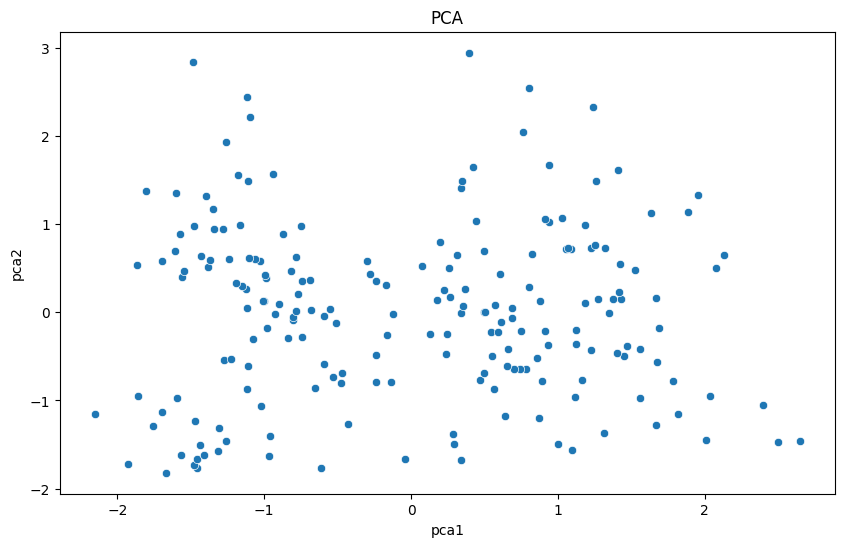

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled[features])

df_pca = pd.DataFrame(df_pca, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', data=df_pca)
plt.title('PCA')
plt.show()

In [20]:
pca.explained_variance_ratio_

array([0.44266167, 0.33308378])

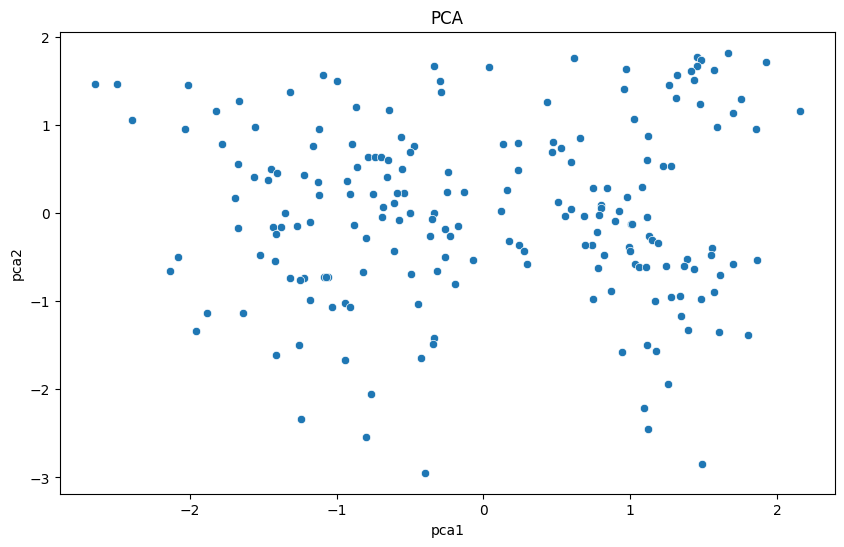

In [21]:
from unsupervised_learning.pca import PCA

pca_scratch = PCA(n_components=2)
df_pca_scratch = pca_scratch.fit_transform(df_scaled[features])

df_pca_scratch = pd.DataFrame(df_pca_scratch, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', data=df_pca_scratch)
plt.title('PCA')
plt.show()

In [22]:
pca_scratch.explained_variance_

array([0.44266167, 0.33308378])